# Import Library

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library for Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, classification_report, mean_squared_error, r2_score
from sklearn.cluster import KMeans

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb

# Load Data

In [7]:
import json

with open('data-sample.json') as f:
    json_load = json.load(f)

In [8]:
json_load

[{'taskLocationDone': {'lon': 109.7629103, 'lat': -6.9266078},
  'taskCreatedTime': '2022-11-01 20:17:26 +0700',
  'cod': {'amount': 685000, 'received': True},
  'taskAssignedTo': 'pacifiedLion0',
  'taskCompletedTime': '2022-11-01 20:46:30 +0700',
  'taskStatus': 'done',
  'flow': 'Delivery',
  'taskId': '4fe3b237c832ca4841a2',
  'UserVar': {'branch_dest': 'SRG',
   'taskStatusLabel': 'Success',
   'receiver_city': 'BATANG ,KAB BATANG',
   'taskDetailStatusLabel': 'YANG BERSANGKUTAN',
   'taskDetailStatus': 'D01',
   'weight': '13',
   'branch_origin': 'CGK',
   'taskStatus': 'COLF01'}},
 {'taskLocationDone': {'lon': 110.0339859, 'lat': -7.8761542},
  'taskCreatedTime': '2022-11-01 08:41:07 +0700',
  'cod': {'amount': 53500, 'received': True},
  'taskAssignedTo': 'peacefulTacos6',
  'taskCompletedTime': '2022-11-01 12:33:48 +0700',
  'taskStatus': 'done',
  'flow': 'Delivery',
  'taskId': '08a4da25256affae8446',
  'UserVar': {'branch_dest': 'MGL',
   'taskStatusLabel': 'Success',
   '

In [9]:
df = pd.json_normalize(json_load)
df

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,2022-11-10 09:07:12 +0700,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,NaN,NaN,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,CGK,COLF01
8330,2022-11-10 09:21:42 +0700,murkyThrushe3,2022-11-10 09:37:52 +0700,done,Delivery,5cc952d9e9f8066dbf24,110.352054,-7.892571,NaN,NaN,JOG,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1,TGR,COLF02
8331,2022-11-10 09:36:44 +0700,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,NaN,NaN,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.44,CGK,COLF01
8332,2022-11-10 07:25:40 +0700,lyingPaella2,2022-11-10 10:37:53 +0800,done,Delivery,e92e813c8539080c922e,119.877173,-8.513305,151000.0,False,KOE,Failed,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,U03,0.6,CGK,COLF02


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   taskCreatedTime                8334 non-null   object 
 1   taskAssignedTo                 8333 non-null   object 
 2   taskCompletedTime              7566 non-null   object 
 3   taskStatus                     8334 non-null   object 
 4   flow                           8334 non-null   object 
 5   taskId                         8334 non-null   object 
 6   taskLocationDone.lon           7566 non-null   float64
 7   taskLocationDone.lat           7566 non-null   float64
 8   cod.amount                     2358 non-null   float64
 9   cod.received                   2358 non-null   object 
 10  UserVar.branch_dest            8334 non-null   object 
 11  UserVar.taskStatusLabel        7572 non-null   object 
 12  UserVar.receiver_city          8282 non-null   o

# Data Preparation

## Fix Data Type

In [11]:
df['taskCreatedTime'] = pd.to_datetime(df['taskCreatedTime'])
df['taskCompletedTime'] = pd.to_datetime(df['taskCompletedTime'], errors='coerce')

df['UserVar.weight'] = pd.to_numeric(df['UserVar.weight'])

/var/folders/g0/kqn0dm690173t925jvn3s65h0000gn/T/ipykernel_1999/2878444496.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['taskCompletedTime'] = pd.to_datetime(df['taskCompletedTime'], errors='coerce')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype                    
---  ------                         --------------  -----                    
 0   taskCreatedTime                8334 non-null   datetime64[ns, UTC+07:00]
 1   taskAssignedTo                 8333 non-null   object                   
 2   taskCompletedTime              7566 non-null   object                   
 3   taskStatus                     8334 non-null   object                   
 4   flow                           8334 non-null   object                   
 5   taskId                         8334 non-null   object                   
 6   taskLocationDone.lon           7566 non-null   float64                  
 7   taskLocationDone.lat           7566 non-null   float64                  
 8   cod.amount                     2358 non-null   float64                  
 9   cod.received                  

## Missing Value

### taskAssignedTo

In [13]:
df[df['taskAssignedTo'].isnull()]

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus
6907,2022-11-09 09:17:47+07:00,NaN,NaT,ongoing,Delivery,464800bc62dd3384dfc5,NaN,NaN,NaN,NaN,TSM,NaN,"CIAMIS , CIAMIS",NaN,NaN,1.0,CGK,NaN


There is one observation containing a missing value with an unclear cause. This row can be removed from the dataset.

### taskCompletedTime

In [14]:
df[df['taskCompletedTime'].isnull()]

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus
550,2022-11-01 15:04:06+07:00,mildCardinal0,NaT,done,Delivery,9779ae5b5f88ba0bf31c,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,3.00,CGK,COLF01
551,2022-11-01 16:59:58+07:00,mildCardinal0,NaT,done,Delivery,8ade827b1e3530c02e82,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,4.90,CGK,COLF01
552,2022-11-01 16:59:58+07:00,mildCardinal0,NaT,done,Delivery,292b1e9f73099dac1209,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,8.00,CGK,COLF01
553,2022-11-01 16:59:58+07:00,mildCardinal0,NaT,done,Delivery,7e8862b3f4010465f006,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,17.00,BDO,COLF01
554,2022-11-01 10:13:02+07:00,mildCardinal0,NaT,done,Delivery,a4fb8aed363abc3d6af3,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,1.00,CGK,COLF01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7954,2022-11-10 09:31:47+07:00,yearningOrange7,NaT,ongoing,Delivery,0247c7beef13f9d2fd7e,NaN,NaN,178000.0,False,BKI,NaN,"BABELAN,CIKARANG",NaN,NaN,1.00,CGK,NaN
7992,2022-11-10 09:31:53+07:00,relievedIguana0,NaT,ongoing,Delivery,abe2c1babb7feef85fda,NaN,NaN,275010.0,False,MDC,NaN,MELONGUANE,NaN,NaN,1.00,CGK,NaN
8002,2022-11-10 09:32:08+07:00,mellowPolenta1,NaT,ongoing,Delivery,d6ce7905450324498c30,NaN,NaN,NaN,NaN,DPK,NaN,"CINERE,DEPOK",NaN,NaN,4.35,CGK,NaN
8007,2022-11-10 09:32:07+07:00,pacifiedThrush4,NaT,ongoing,Delivery,d3db332e6196498e781d,NaN,NaN,269000.0,False,PDG,NaN,"GUNUNG TALANG,AROSUK",NaN,NaN,1.00,CGK,NaN


In [15]:
df[df['taskCompletedTime'].isnull()]['taskStatus'].value_counts(dropna=False)

taskStatus
ongoing    762
done         6
Name: count, dtype: int64

In [16]:
df[df['taskCompletedTime'].isnull()]['UserVar.taskStatusLabel'].value_counts(dropna=False)

UserVar.taskStatusLabel
NaN        762
Success      6
Name: count, dtype: int64

It is reasonable for the taskCompletedTime field to be empty if the delivery task is still in progress. However, there are cases where the delivery task has been completed, yet the taskCompletedTime is missing. This is considered as an anomaly, and rows with such condition most likely be excluded from the dataset. 

### taskLocationDone.lon & taskLocationDone.lat

In [17]:
df[df['taskLocationDone.lon'].isnull()]['taskStatus'].value_counts(dropna=False)

taskStatus
ongoing    762
done         6
Name: count, dtype: int64

In [18]:
df[df['taskLocationDone.lat'].isnull()]['taskStatus'].value_counts(dropna=False)

taskStatus
ongoing    762
done         6
Name: count, dtype: int64

The fields taskLocationDone.lon and taskLocationDone.lat exhibit a similar pattern to taskCompletedTime, where it is expected that there are no values for tasks that are in still progress. However, there are also cases where these fields are empty despite the delivery task being marked as completed/success. This further reinforces the decision to remove those observations form the dataset.

### cod

In [19]:
df['cod.amount'].apply(lambda x:0 if pd.isnull(x) else 1).value_counts()

cod.amount
0    5976
1    2358
Name: count, dtype: int64

In [20]:
df['cod.received'].value_counts(dropna=False)

cod.received
NaN      5976
False    1663
True      695
Name: count, dtype: int64

The fields cod.amount and cod.received contain missing values for deliveries that did not use COD method. Therefore, a new field can be created to indicat whether a delivery was conducted using COD method or not, based on the presence or absence of values in those two fields.

### userVar.taskStatusLabel & userVar.taskDetailStatus

In [21]:
df['UserVar.taskStatusLabel'].value_counts(dropna=False)

UserVar.taskStatusLabel
Success    5427
Failed     2145
NaN         762
Name: count, dtype: int64

In [22]:
df['UserVar.taskDetailStatus'].apply(lambda x:0 if pd.isnull(x) else 1).value_counts(dropna=False)

UserVar.taskDetailStatus
1    7572
0     762
Name: count, dtype: int64

In [23]:
df['taskStatus'].value_counts(dropna=False)

taskStatus
done       7572
ongoing     762
Name: count, dtype: int64

The missing values observed in the fields userVar.taskStatusLabel and userVar.taskDetailStatus are caused by delivery tasks that are still in progress, as indicated by the values in the taskStatus column.

### Fix Missing Value

In [24]:
df = df.dropna(subset='taskAssignedTo')
df = df[~((df['taskCompletedTime'].isnull())&(df['taskStatus']=='done'))].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8327 entries, 0 to 8326
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype                    
---  ------                         --------------  -----                    
 0   taskCreatedTime                8327 non-null   datetime64[ns, UTC+07:00]
 1   taskAssignedTo                 8327 non-null   object                   
 2   taskCompletedTime              7566 non-null   object                   
 3   taskStatus                     8327 non-null   object                   
 4   flow                           8327 non-null   object                   
 5   taskId                         8327 non-null   object                   
 6   taskLocationDone.lon           7566 non-null   float64                  
 7   taskLocationDone.lat           7566 non-null   float64                  
 8   cod.amount                     2358 non-null   float64                  
 9   cod.received                  

## Duplicate Value

In [25]:
df[df['taskId'].duplicated()]

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus


There is no duplicate value based on task identifier field

# Feature Engineering

## taskDuration

In [26]:
df['taskDuration'] = df.apply(lambda x:np.nan if pd.isnull(x['taskCompletedTime']) else (x['taskCompletedTime'] - x['taskCreatedTime'])/pd.Timedelta(minutes=1), axis=1)
df

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus,taskDuration
0,2022-11-01 20:17:26+07:00,pacifiedLion0,2022-11-01 20:46:30+07:00,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13.000,CGK,COLF01,29.066667
1,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 12:33:48+07:00,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.300,CGK,COLF01,232.683333
2,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 13:41:57+07:00,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01,300.833333
3,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 18:18:19+07:00,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01,577.200000
4,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 10:51:49+07:00,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01,130.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8322,2022-11-10 09:07:12+07:00,debonairPonie1,2022-11-10 09:38:04+07:00,done,Delivery,501af4e040a742e9e878,0.000000,0.000000,NaN,NaN,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1.000,CGK,COLF01,30.866667
8323,2022-11-10 09:21:42+07:00,murkyThrushe3,2022-11-10 09:37:52+07:00,done,Delivery,5cc952d9e9f8066dbf24,110.352054,-7.892571,NaN,NaN,JOG,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1.000,TGR,COLF02,16.166667
8324,2022-11-10 09:36:44+07:00,enragedCake7,2022-11-10 09:37:55+07:00,done,Delivery,1b136b5a3c60749eb571,105.664897,-5.359063,NaN,NaN,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.440,CGK,COLF01,1.183333
8325,2022-11-10 07:25:40+07:00,lyingPaella2,2022-11-10 10:37:53+08:00,done,Delivery,e92e813c8539080c922e,119.877173,-8.513305,151000.0,False,KOE,Failed,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,U03,0.600,CGK,COLF02,132.216667


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8327 entries, 0 to 8326
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype                    
---  ------                         --------------  -----                    
 0   taskCreatedTime                8327 non-null   datetime64[ns, UTC+07:00]
 1   taskAssignedTo                 8327 non-null   object                   
 2   taskCompletedTime              7566 non-null   object                   
 3   taskStatus                     8327 non-null   object                   
 4   flow                           8327 non-null   object                   
 5   taskId                         8327 non-null   object                   
 6   taskLocationDone.lon           7566 non-null   float64                  
 7   taskLocationDone.lat           7566 non-null   float64                  
 8   cod.amount                     2358 non-null   float64                  
 9   cod.received                  

## taskCreatedDay

In [28]:
df['taskCreatedTime'].dt.day_name().value_counts()

taskCreatedTime
Thursday     1902
Wednesday    1819
Tuesday      1406
Friday        901
Monday        875
Saturday      853
Sunday        571
Name: count, dtype: int64

In [29]:
df['taskCreatedDayName'] = df['taskCreatedTime'].dt.day_name()
df['taskCreatedDayNumber'] = df['taskCreatedTime'].dt.day_of_week


In [30]:
df['taskCreatedDayName'].value_counts()

taskCreatedDayName
Thursday     1902
Wednesday    1819
Tuesday      1406
Friday        901
Monday        875
Saturday      853
Sunday        571
Name: count, dtype: int64

In [31]:
df['taskCreatedDayNumber'].value_counts()

taskCreatedDayNumber
3    1902
2    1819
1    1406
4     901
0     875
5     853
6     571
Name: count, dtype: int64

## taskCreatedHour

In [32]:
df['taskCreatedHour'] = df['taskCreatedTime'].dt.hour

In [33]:
df['taskCreatedHour'].value_counts()

taskCreatedHour
7     4631
8     2183
9      584
10     384
11     211
12     161
13     135
17      12
14       7
16       6
18       6
15       4
20       3
Name: count, dtype: int64

## is_cod

In [34]:
df['is_cod'] = df['cod.received'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [35]:
df['is_cod'].value_counts()

is_cod
0    5969
1    2358
Name: count, dtype: int64

# Descriptive Analysis

In [58]:
task_status = df['taskStatus'].value_counts()
task_status

taskStatus
done       7566
ongoing     761
Name: count, dtype: int64

In [50]:
def func(pct, allvals):
    """
    Fungsi untuk menampilkan persentase dan nilai absolut.
    """
    absolute = int(round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})" 

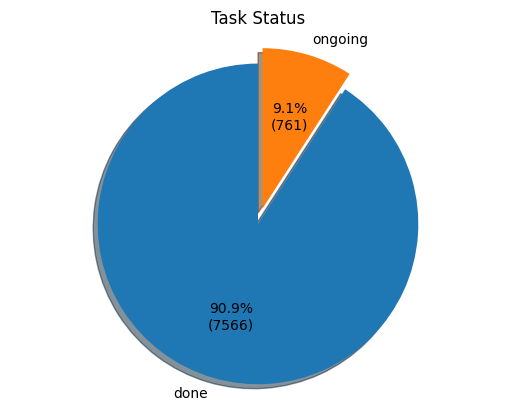

In [52]:
explode = (0, 0.1)

# fig1, ax1 = plt.subplots()
plt.pie(task_status.values, 
        explode=explode, 
        labels=task_status.index, 
        autopct=lambda pct: func(pct, task_status.values),
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Menambahkan judul
plt.title("Task Status")
plt.show()

In [53]:
task_status_label = df['UserVar.taskStatusLabel'].value_counts()
task_status_label.values

array([5421, 2145])

In [56]:
task_status_label

UserVar.taskStatusLabel
Success    5421
Failed     2145
Name: count, dtype: int64

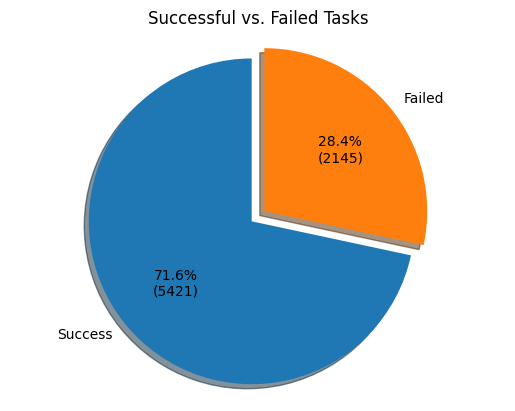

In [57]:
explode = (0, 0.1)

# fig1, ax1 = plt.subplots()
plt.pie(task_status_label.values, 
        explode=explode, 
        labels=task_status_label.index, 
        autopct=lambda pct: func(pct, task_status_label.values),
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Menambahkan judul
plt.title("Successful vs. Failed Tasks")
plt.show()

The analysis reveals a high-throughput process, with 90.9% of all tasks reaching completion. However, this efficiency is undermined by a significant quality issue: 28.3% of all completed tasks end in failure. 

In [59]:
df['taskDuration']

0        29.066667
1       232.683333
2       300.833333
3       577.200000
4       130.700000
           ...    
8322     30.866667
8323     16.166667
8324      1.183333
8325    132.216667
8326    111.616667
Name: taskDuration, Length: 8327, dtype: float64

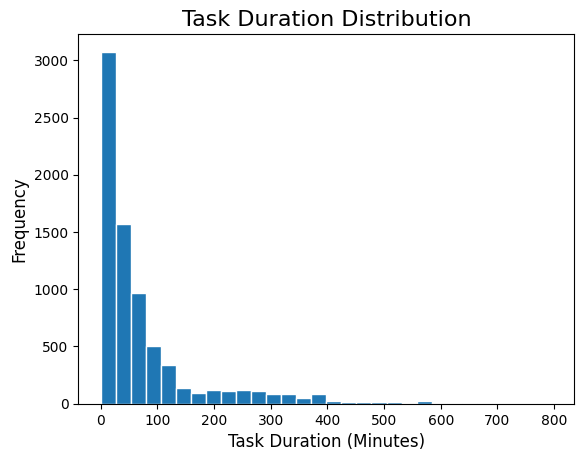

In [64]:
plt.hist(df['taskDuration'], bins=30, edgecolor='white')


plt.title('Task Duration Distribution', fontsize=16)
plt.xlabel('Task Duration (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

The process of doing task is highly efficient for the vast majority of tasks. The distribution is heavily concentrated at the low end, indicating that a large volume of tasks completes very quickly (likely in under 50 minutes). The distribution also is strongly right-skewed, with a long tail. This shows that while infrequent, there is a notable number of outlier tasks that take an exceptionally long time to complete (e.g., exceeding 150-200 minutes).

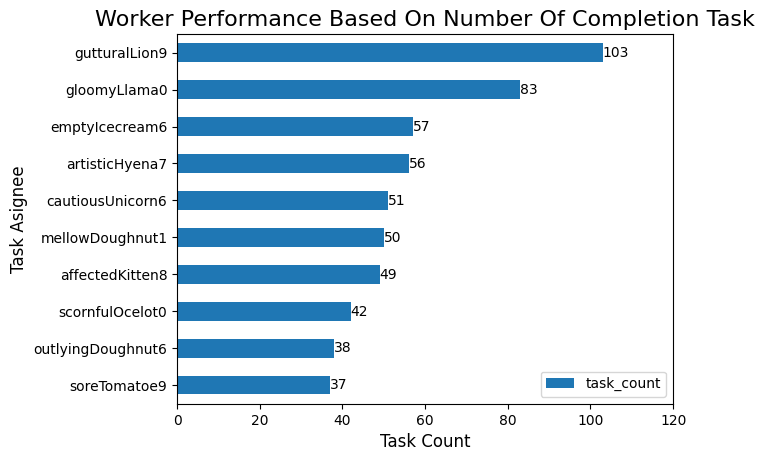

In [113]:
ax = df[df['taskStatus']=='done'].\
    groupby('taskAssignedTo').\
    agg(task_count=('taskId','count')).\
    sort_values('task_count', ascending=False).\
    head(10).iloc[::-1].\
    plot(kind='barh')
ax.set_xlim(0,120)
plt.bar_label(ax.containers[0])
plt.title('Worker Performance Based On Number Of Completion Task', fontsize=16)
plt.xlabel('Task Count', fontsize=12)
plt.ylabel('Task Asignee', fontsize=12)
plt.show()

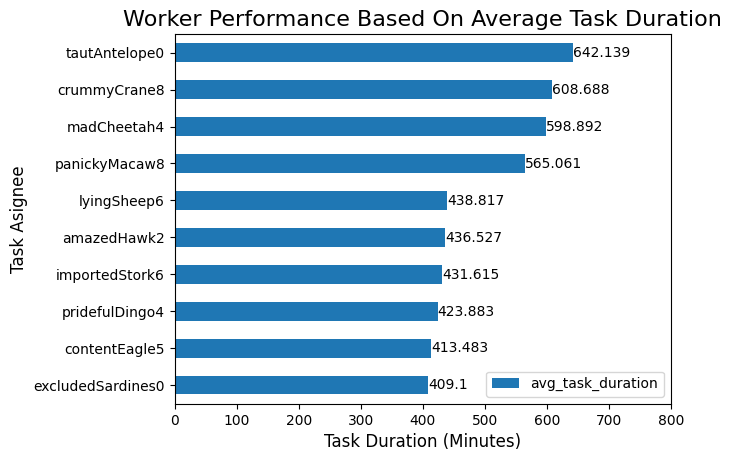

In [123]:
ax = df[df['taskStatus']=='done'].\
    groupby('taskAssignedTo').\
    agg(avg_task_duration=('taskDuration','mean')).\
    sort_values('avg_task_duration', ascending=False).\
    head(10).iloc[::-1].\
    plot(kind='barh')
ax.set_xlim(0,800)
ax.legend(loc='lower right')
plt.bar_label(ax.containers[0])
plt.title('Worker Performance Based On Average Task Duration', fontsize=16)
plt.xlabel('Task Duration (Minutes)', fontsize=12)
plt.ylabel('Task Asignee', fontsize=12)
plt.show()

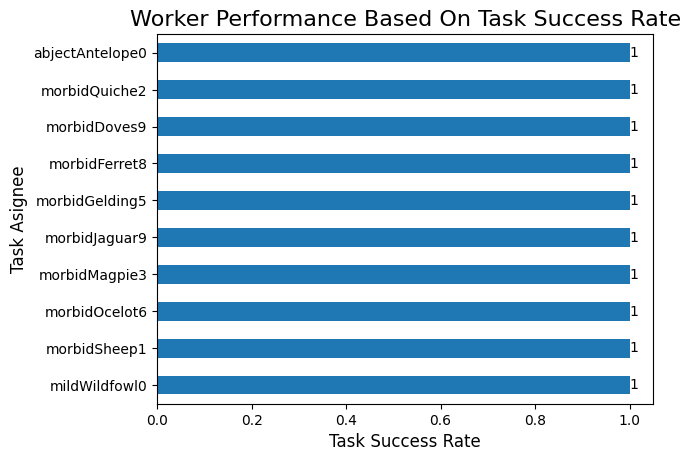

In [147]:
ax = df[(df['taskStatus']=='done')&(df['UserVar.taskStatusLabel']=='Success')].\
    groupby('taskAssignedTo').\
    agg(task_success=('taskId', 'count')).\
    merge(df[(df['taskStatus']=='done')].\
    groupby('taskAssignedTo').\
    agg(task_all=('taskId', 'count')),
    left_index=True,
    right_index=True, 
    how='outer').\
    fillna(0).\
    assign(task_success_rate = lambda x:x['task_success']/x['task_all']).\
    sort_values('task_success_rate', ascending=False).\
    head(10).iloc[::-1,-1].\
    plot(kind='barh')
# ax.set_xlim(0,800)
# ax.legend(loc='lower right')
plt.bar_label(ax.containers[0])
plt.title('Worker Performance Based On Task Success Rate', fontsize=16)
plt.xlabel('Task Success Rate', fontsize=12)
plt.ylabel('Task Asignee', fontsize=12)
plt.show()

In [68]:
heatmap_data = df.groupby(['taskCreatedDayName', 'taskCreatedHour']).count()['taskId'].reset_index()
heatmap_data.head()

,taskCreatedDayName,taskCreatedHour,taskId
0,Friday,7,62
1,Friday,8,115
2,Friday,9,197
3,Friday,10,162
4,Friday,11,121


In [75]:
heatmap_pivot = heatmap_data.pivot_table(values='taskId', index='taskCreatedDayName', columns='taskCreatedHour', fill_value=0)
heatmap_pivot

taskCreatedHour,7,8,9,10,11,12,13,14,15,16,17,18,20
taskCreatedDayName,,,,,,,,,,,,,
Friday,62.0,115.0,197.0,162.0,121.0,119.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0
Monday,643.0,232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Saturday,768.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sunday,374.0,197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thursday,998.0,727.0,177.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tuesday,695.0,232.0,77.0,222.0,90.0,42.0,10.0,7.0,4.0,6.0,12.0,6.0,3.0
Wednesday,1091.0,595.0,133.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
heatmap_pivot = heatmap_pivot.reindex(day_order)
heatmap_pivot = heatmap_pivot.reindex(columns=[7,8,9,10,11,12,13,14,15,16,17,18,19,20]).fillna(0)
heatmap_pivot

taskCreatedHour,7,8,9,10,11,12,13,14,15,16,17,18,19,20
taskCreatedDayName,,,,,,,,,,,,,,
Monday,643.0,232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tuesday,695.0,232.0,77.0,222.0,90.0,42.0,10.0,7.0,4.0,6.0,12.0,6.0,0.0,3.0
Wednesday,1091.0,595.0,133.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thursday,998.0,727.0,177.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Friday,62.0,115.0,197.0,162.0,121.0,119.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Saturday,768.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sunday,374.0,197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


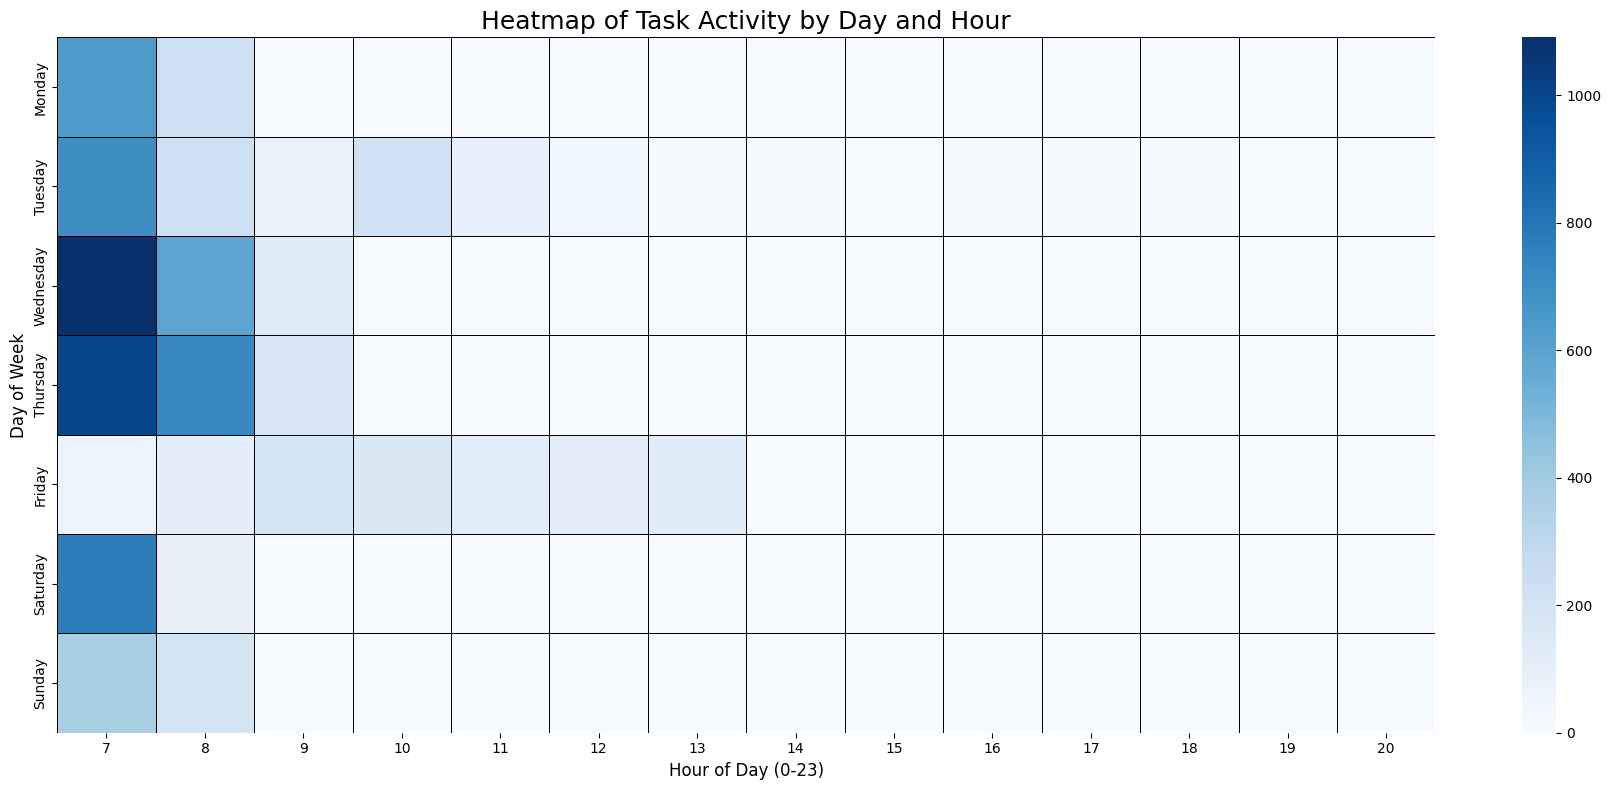

In [ ]:
plt.figure(figsize=(18, 8)) # Set the figure size

heatmap = sns.heatmap(
    heatmap_pivot,
    cmap='Blues',      # 'viridis' is a commonly used color scheme
    annot=False,         # Do not display numbers in each cell (it would be too crowded)
    linewidths=.5,
    linecolor='black'
)

# Add title and labels
plt.title('Heatmap of Task Activity by Day and Hour', fontsize=18)
plt.xlabel('Hour of Day (0-23)', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)

plt.tight_layout()
plt.show()

* **High Concentration in the Morning:** Task activity is overwhelmingly concentrated in the early morning, specifically between **7 AM and 9 AM**.
* **Peak Load on Wednesday:** The absolute busiest time is **Wednesday at 7 AM**. Most weekdays (Monday-Thursday) follow a similar pattern of high activity in the morning that sharply drops off.
* **Anomalous & Idle Periods:** Activity is nearly non-existent after 9 AM on most days. **Friday** shows a different, much lower-volume pattern, and weekend activity is minimal, indicating distinct operational schedules.

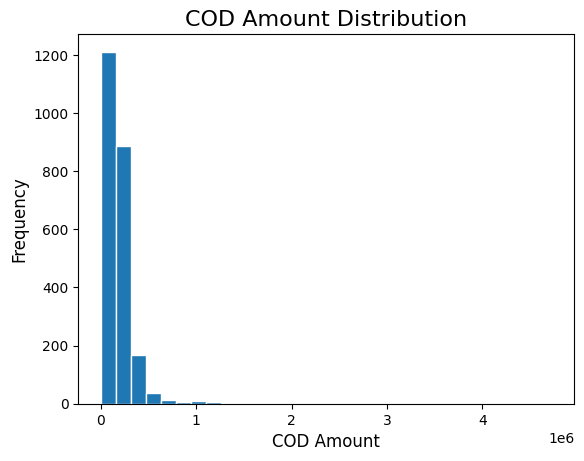

In [85]:
plt.hist(df['cod.amount'], bins=30, edgecolor='white')


plt.title('COD Amount Distribution', fontsize=16)
plt.xlabel('COD Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Based on the histogram, here are the key insights:

* **Most COD transactions are for small amounts.** The distribution is heavily concentrated on the far left, with the highest frequency of orders falling into the lowest value brackets.

* **High-value orders are rare outliers.** The graph is **strongly right-skewed**, with a long tail. This indicates that transactions with a large COD amount are very infrequent compared to the typical low-value purchase.

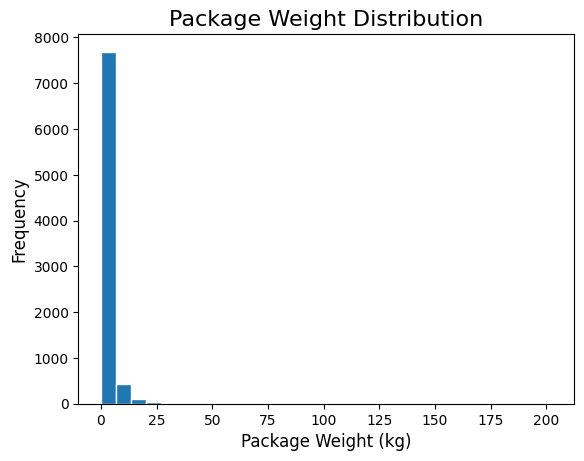

In [87]:
plt.hist(df['UserVar.weight'], bins=30, edgecolor='white')

plt.title('Package Weight Distribution', fontsize=16)
plt.xlabel('Package Weight (kg)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Here are the key insights from the "Package Weight Distribution" chart:

* The vast majority of packages are **very lightweight**, with activity heavily concentrated in the first few kilograms.
* The distribution is **extremely right-skewed**, which means that heavy packages are **rare outliers** compared to the typical light package.
* This pattern suggests that logistics and handling processes are primarily dealing with small items, and very heavy packages are exceptional cases.

In [41]:
df[['taskStatus','UserVar.taskStatusLabel','cod.received']].value_counts(dropna=False).\
to_frame().reset_index()

,taskStatus,UserVar.taskStatusLabel,cod.received,count
0,done,Success,NaN,4682
1,done,Failed,False,1235
2,done,Failed,NaN,910
3,done,Success,True,695
4,ongoing,NaN,False,384
5,ongoing,NaN,NaN,377
6,done,Success,False,44


# Modeling 

## Classification

In [159]:
df_model = df[df['taskStatus']=='done']
df_model['cod.amount'] = df_model['cod.amount'].fillna(0)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7566 entries, 0 to 8326
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype                    
---  ------                         --------------  -----                    
 0   taskCreatedTime                7566 non-null   datetime64[ns, UTC+07:00]
 1   taskAssignedTo                 7566 non-null   object                   
 2   taskCompletedTime              7566 non-null   object                   
 3   taskStatus                     7566 non-null   object                   
 4   flow                           7566 non-null   object                   
 5   taskId                         7566 non-null   object                   
 6   taskLocationDone.lon           7566 non-null   float64                  
 7   taskLocationDone.lat           7566 non-null   float64                  
 8   cod.amount                     7566 non-null   float64                  
 9   cod.received                   1974

/var/folders/g0/kqn0dm690173t925jvn3s65h0000gn/T/ipykernel_1999/2674678866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['cod.amount'] = df_model['cod.amount'].fillna(0)


In [160]:
df_model.columns

Index(['taskCreatedTime', 'taskAssignedTo', 'taskCompletedTime', 'taskStatus',
       'flow', 'taskId', 'taskLocationDone.lon', 'taskLocationDone.lat',
       'cod.amount', 'cod.received', 'UserVar.branch_dest',
       'UserVar.taskStatusLabel', 'UserVar.receiver_city',
       'UserVar.taskDetailStatusLabel', 'UserVar.taskDetailStatus',
       'UserVar.weight', 'UserVar.branch_origin', 'UserVar.taskStatus',
       'taskDuration', 'taskCreatedDayName', 'taskCreatedDayNumber',
       'taskCreatedHour', 'is_cod'],
      dtype='object')

In [164]:
X_cl = df_model.drop(['taskId','taskAssignedTo','taskStatus',
                'flow','taskLocationDone.lon','taskLocationDone.lat',
                'taskCreatedTime','taskCompletedTime','UserVar.taskStatusLabel',
                'cod.received','UserVar.branch_dest','UserVar.receiver_city',
                'UserVar.taskDetailStatusLabel','UserVar.taskDetailStatus',
                'UserVar.branch_origin','UserVar.taskStatus','taskCreatedDayName',
                ], axis=1)
y_cl = df_model['UserVar.taskStatusLabel'].apply(lambda x: 1 if x == 'Success' else 0)

In [166]:
X_cl.head()

,cod.amount,UserVar.weight,taskDuration,taskCreatedDayNumber,taskCreatedHour,is_cod
0,685000.0,13.000,29.066667,1,20,1
1,53500.0,1.300,232.683333,1,8,1
2,179500.0,3.000,300.833333,1,8,1
3,31815.0,0.625,577.200000,1,8,1
4,144562.0,3.000,130.700000,1,8,1


In [168]:
y_cl

0       1
1       1
2       1
3       1
4       1
       ..
8322    1
8323    0
8324    1
8325    0
8326    1
Name: UserVar.taskStatusLabel, Length: 7566, dtype: int64

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['cod.amount','UserVar.weight','taskDuration','taskCreatedHour']),
        ('cat','passthrough',['taskCreatedDayNumber','is_cod'])
    ])

In [198]:
y_cl.value_counts()

UserVar.taskStatusLabel
1    5421
0    2145
Name: count, dtype: int64

In [210]:

X_cl_train, X_cl_test, y_cl_train, y_cl_test = train_test_split(X_cl, y_cl, test_size=0.2, random_state=42, stratify=y_cl)


# 1. Logistic Regression (Baseline)
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])
pipeline_lr.fit(X_cl_train, y_cl_train)
y_cl_pred_lr = pipeline_lr.predict(X_cl_test)
print("--- Logistic Regression (Baseline) ---")
print(f"Precision: {precision_score(y_cl_test, y_cl_pred_lr):.4f}")
print(classification_report(y_cl_test, y_cl_pred_lr))

# 2. Random Forest
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])
pipeline_rf.fit(X_cl_train, y_cl_train)
y_cl_pred_rf = pipeline_rf.predict(X_cl_test)
print("--- Random Forest ---")
print(f"Precision: {precision_score(y_cl_test, y_cl_pred_rf):.4f}")
print(classification_report(y_cl_test, y_cl_pred_rf))

# 3. XGBoost
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))])
pipeline_xgb.fit(X_cl_train, y_cl_train)
y_cl_pred_xgb = pipeline_xgb.predict(X_cl_test)
print("--- XGBoost ---")
print(f"Precision: {precision_score(y_cl_test, y_cl_pred_xgb):.4f}")
print(classification_report(y_cl_test, y_cl_pred_xgb))


# --- Tuning Hyperparameter untuk Random Forest ---
print("--- Tuning Hyperparameter for Random Forest (GridSearchCV) ---")
param_grid = {
   'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_leaf': [2, 4]
}

grid_search = GridSearchCV(pipeline_rf, param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_cl_train, y_cl_train)

print(f"Best Parameter: {grid_search.best_params_}")
best_rf = grid_search.best_estimator_
y_cl_pred_best_rf = best_rf.predict(X_cl_test)
print("--- Random Forest (After Tuning) ---")
print(f"Precision: {precision_score(y_cl_test, y_cl_pred_best_rf):.4f}\n")

--- Logistic Regression (Baseline) ---
Precision: 0.8407
              precision    recall  f1-score   support

           0       0.90      0.53      0.67       429
           1       0.84      0.98      0.90      1085

    accuracy                           0.85      1514
   macro avg       0.87      0.75      0.79      1514
weighted avg       0.86      0.85      0.84      1514

--- Random Forest ---
Precision: 0.9339
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       429
           1       0.93      0.95      0.94      1085

    accuracy                           0.92      1514
   macro avg       0.90      0.89      0.90      1514
weighted avg       0.92      0.92      0.92      1514

--- XGBoost ---
Precision: 0.9254
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       429
           1       0.93      0.96      0.94      1085

    accuracy                           0.92      15

/Users/jds/Documents/logistic_operational_analysis/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [23:12:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameter: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 200}
--- Random Forest (After Tuning) ---
Precision: 0.9343



In [208]:
X_cl.columns

Index(['cod.amount', 'UserVar.weight', 'taskDuration', 'taskCreatedDayNumber',
       'taskCreatedHour', 'is_cod'],
      dtype='object')

In [223]:
feature_importance_cl = {i: j for i, j in zip(X_cl.columns, best_rf.steps[1][1].feature_importances_)}
{k: v for k, v in sorted(feature_importance_cl.items(), key=lambda item: item[1], reverse=True)}

{'taskDuration': np.float64(0.48576617456805504),
 'cod.amount': np.float64(0.15974534178900698),
 'taskCreatedHour': np.float64(0.10831471779144722),
 'is_cod': np.float64(0.09591534559475112),
 'taskCreatedDayNumber': np.float64(0.08747992941003739),
 'UserVar.weight': np.float64(0.06277849084670212)}

## Regression

In [234]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['cod.amount','UserVar.weight','taskCreatedHour']),
        ('cat','passthrough',['taskCreatedDayNumber','is_cod','task_status_label'])
    ])

In [235]:
X_reg = df_model.\
        assign(task_status_label = lambda x:x['UserVar.taskStatusLabel'].apply(lambda y:1 if y=='Success' else 0))[['cod.amount', 'UserVar.weight','task_status_label','taskCreatedDayNumber',
       'taskCreatedHour', 'is_cod']]
y_reg = df_model['taskDuration']


X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

def evaluate_regressor(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"--- {name} ---")
    print(f"R-squared: {r2:.4f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.4f}\n")

# 1. Linear Regression
pipeline_linreg = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
pipeline_linreg.fit(X_train_reg, y_train_reg)
evaluate_regressor("Linear Regression", pipeline_linreg, X_test_reg, y_test_reg)

# 2. Ridge Regression
pipeline_ridge = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Ridge(random_state=42))])
pipeline_ridge.fit(X_train_reg, y_train_reg)
evaluate_regressor("Ridge Regression", pipeline_ridge, X_test_reg, y_test_reg)

# 3. Random Forest Regressor
pipeline_rf_reg = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))])
pipeline_rf_reg.fit(X_train_reg, y_train_reg)
evaluate_regressor("Random Forest Regressor", pipeline_rf_reg, X_test_reg, y_test_reg)

--- Linear Regression ---
R-squared: 0.2593
RMSE (Root Mean Squared Error): 88.5481

--- Ridge Regression ---
R-squared: 0.2593
RMSE (Root Mean Squared Error): 88.5504

--- Random Forest Regressor ---
R-squared: 0.6805
RMSE (Root Mean Squared Error): 58.1583



In [237]:
coef_rl = {i: j for i, j in zip(X_reg.columns, pipeline_linreg.steps[1][1].coef_)}
{k: v for k, v in sorted(coef_rl.items(), key=lambda item: item[1], reverse=True)}

{'is_cod': np.float64(101.78070693139911),
 'taskCreatedHour': np.float64(90.40744708038623),
 'task_status_label': np.float64(15.62591565103055),
 'taskCreatedDayNumber': np.float64(2.1494444458615716),
 'UserVar.weight': np.float64(-3.7854937366671657),
 'cod.amount': np.float64(-4.329191131965218)}

## Clustering

In [187]:
worker_data = df_model.\
        assign(task_status_label = lambda x:x['UserVar.taskStatusLabel'].apply(lambda y:1 if y=='Success' else 0)).\
        groupby('taskAssignedTo').\
        agg(
            total_tasks=('taskId', 'count'),
            avg_duration=('taskDuration', 'mean'),
            success_rate=('task_status_label', 'mean'),
            avg_weight=('UserVar.weight', 'mean'),
            total_cod_amount=('cod.amount', 'sum'),
            cod_tasks_prop=('is_cod', 'mean')
        ).reset_index()

worker_data

,taskAssignedTo,total_tasks,avg_duration,success_rate,avg_weight,total_cod_amount,cod_tasks_prop
0,abjectAntelope0,1,23.483333,1.00,3.000000,0.0,0.00
1,abjectCaribou1,4,172.470833,0.75,0.570000,12950.0,0.25
2,abjectCur0,2,60.783333,1.00,1.500000,0.0,0.00
3,abjectFerret4,2,49.183333,0.50,1.000000,237195.0,0.50
4,abjectMuesli1,3,60.022222,1.00,1.000000,0.0,0.00
...,...,...,...,...,...,...,...
2724,zestySalt8,4,27.150000,1.00,5.875000,0.0,0.00
2725,zestySausage4,3,328.905556,1.00,0.836667,781715.0,1.00
2726,zestyTeal8,3,76.983333,0.00,2.056000,505671.0,1.00
2727,zestyTermite8,1,125.866667,1.00,1.000000,0.0,0.00


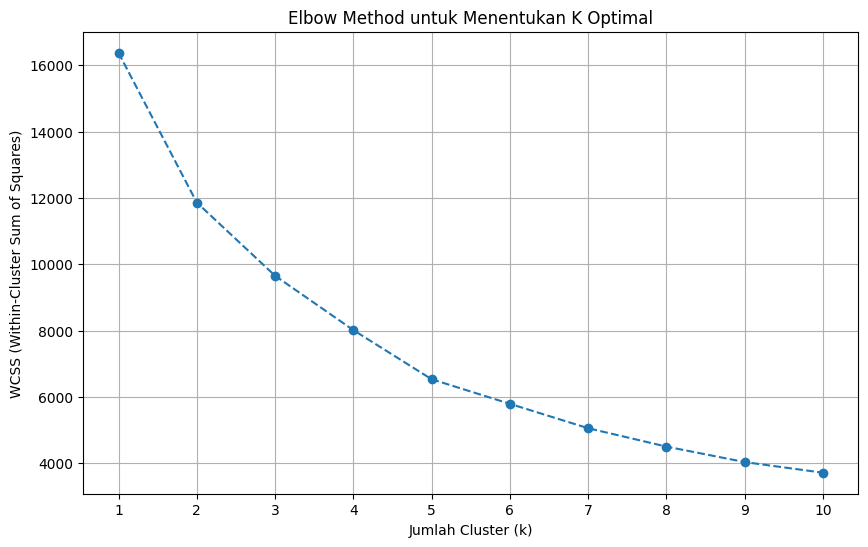

In [190]:
X_cluster = worker_data.drop('taskAssignedTo', axis=1)

# Scaling adalah langkah wajib untuk K-Means
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# --- Menentukan Jumlah Cluster Optimal (Elbow Method) ---
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [192]:
worker_data

,taskAssignedTo,total_tasks,avg_duration,success_rate,avg_weight,total_cod_amount,cod_tasks_prop,cluster
0,abjectAntelope0,1,23.483333,1.00,3.000000,0.0,0.00,0
1,abjectCaribou1,4,172.470833,0.75,0.570000,12950.0,0.25,2
2,abjectCur0,2,60.783333,1.00,1.500000,0.0,0.00,0
3,abjectFerret4,2,49.183333,0.50,1.000000,237195.0,0.50,1
4,abjectMuesli1,3,60.022222,1.00,1.000000,0.0,0.00,0
...,...,...,...,...,...,...,...,...
2724,zestySalt8,4,27.150000,1.00,5.875000,0.0,0.00,0
2725,zestySausage4,3,328.905556,1.00,0.836667,781715.0,1.00,2
2726,zestyTeal8,3,76.983333,0.00,2.056000,505671.0,1.00,1
2727,zestyTermite8,1,125.866667,1.00,1.000000,0.0,0.00,0



--- Analisis Hasil 4 Cluster Kurir ---


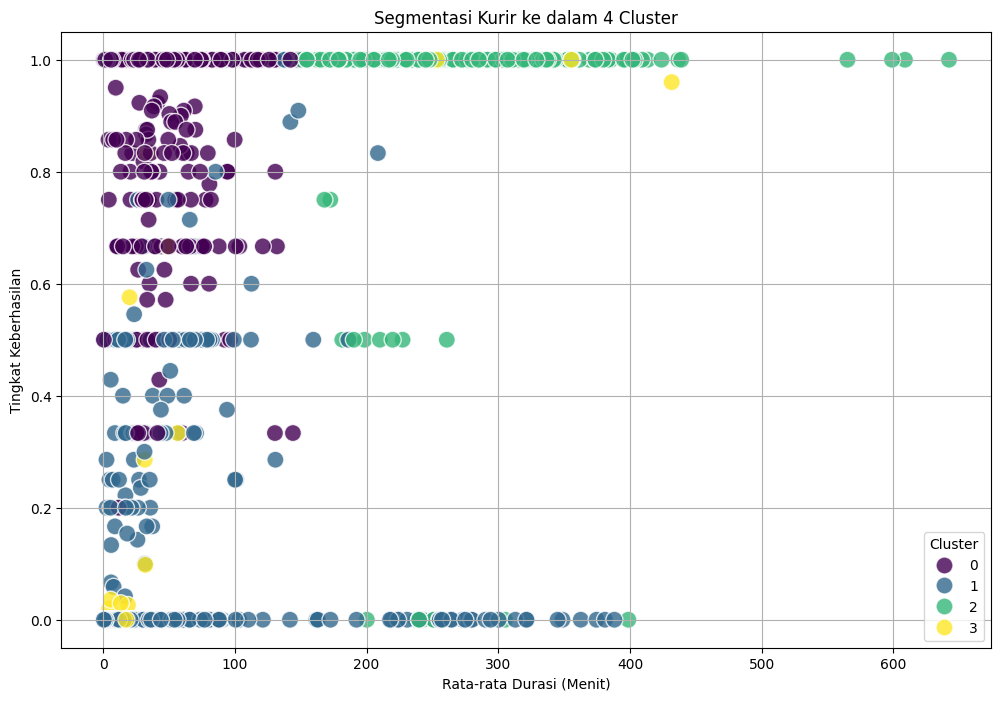

In [196]:
# --- Melatih Model K-Means dengan K Optimal ---
OPTIMAL_K = 4 # Ganti berdasarkan grafik Elbow Anda
kmeans = KMeans(n_clusters=OPTIMAL_K, init='k-means++', random_state=42, n_init=10)
worker_data['cluster'] = kmeans.fit_predict(X_cluster_scaled)

# --- Analisis Hasil Cluster ---
print(f"\n--- Analisis Hasil {OPTIMAL_K} Cluster Kurir ---")
# cluster_summary = worker_data.groupby('cluster').mean()
# print(cluster_summary)

# Visualisasi Cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(data=worker_data, x='avg_duration', y='success_rate', hue='cluster', palette='viridis', s=150, alpha=0.8)
plt.title(f'Segmentasi Kurir ke dalam {OPTIMAL_K} Cluster')
plt.xlabel('Rata-rata Durasi (Menit)')
plt.ylabel('Tingkat Keberhasilan')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

The analysis identifies four distinct courier performance profiles based on their average speed and success rate:

* **Cluster 3 (Yellow) - The Top Performers:** This is the ideal group. These couriers consistently achieve a very high success rate across various delivery durations.

* **Cluster 0 (Purple) - The Fast but Inconsistent:** These couriers are quick, but their performance is unpredictable, with success rates ranging anywhere from 0% to 100%.

* **Cluster 2 (Green) - The Slow & Polarized:** This group takes a long time per delivery, and their outcomes are extreme—they tend to either succeed completely (100% rate) or fail completely (0% rate).

* **Cluster 1 (Blue) - The Fast & Mediocre:** This unique segment consists of fast couriers who consistently perform at a mediocre ~50% success rate.